Dataset loaded successfully.


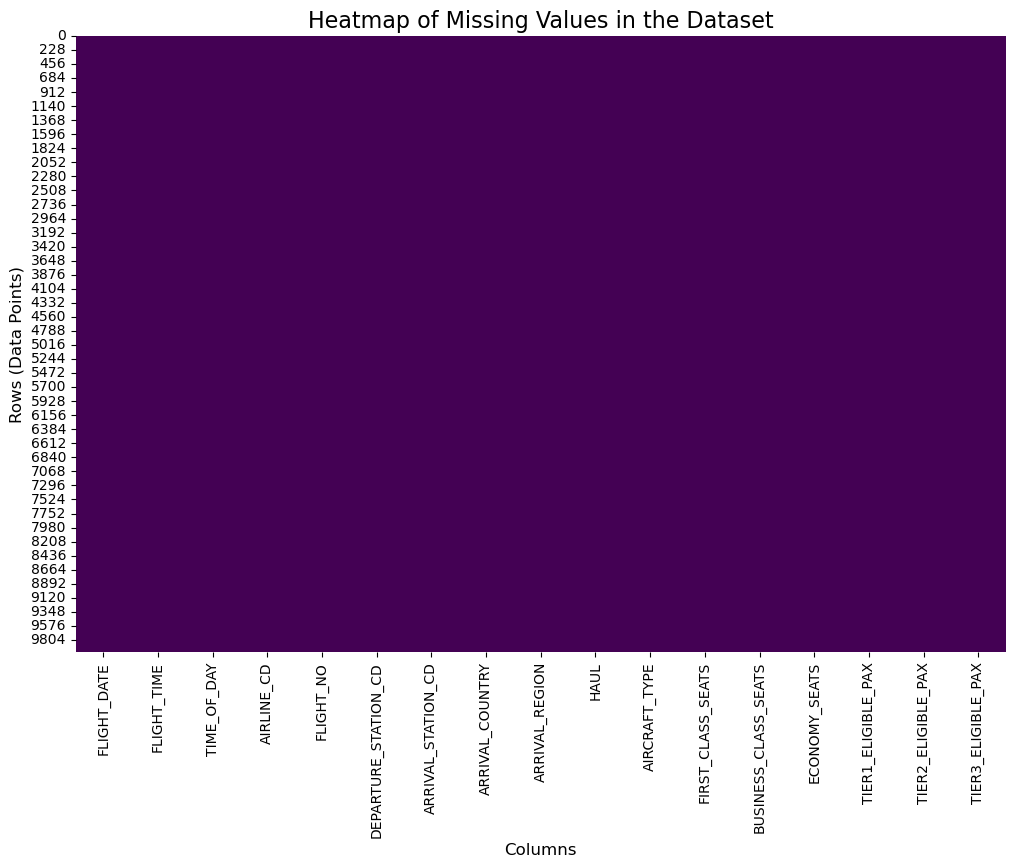


Percentage of missing values per column:
Series([], dtype: float64)
Series([], dtype: float64)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load the data using Pandas for initial EDA ---
try:
    df = pd.read_csv("flights.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: flights.csv not found. Please ensure the dataset is in the same folder.")
    exit()

# --- Step 2: Create the Missing Value Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Heatmap of Missing Values in the Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows (Data Points)', fontsize=12)
plt.show()

# --- Step 3: Quantify Missing Values ---
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

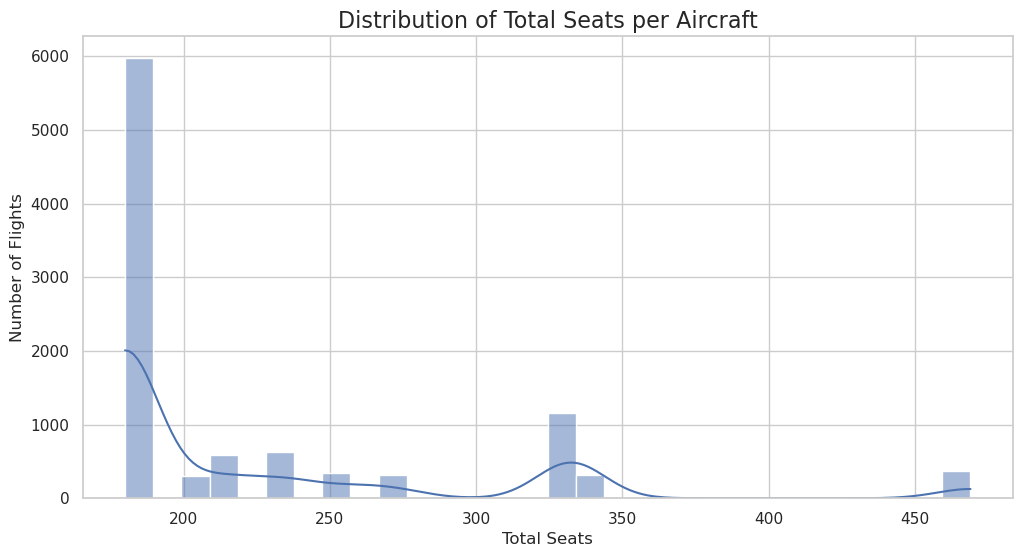

/tmp/ipykernel_426/1729863653.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HAUL', data=df, palette='viridis')


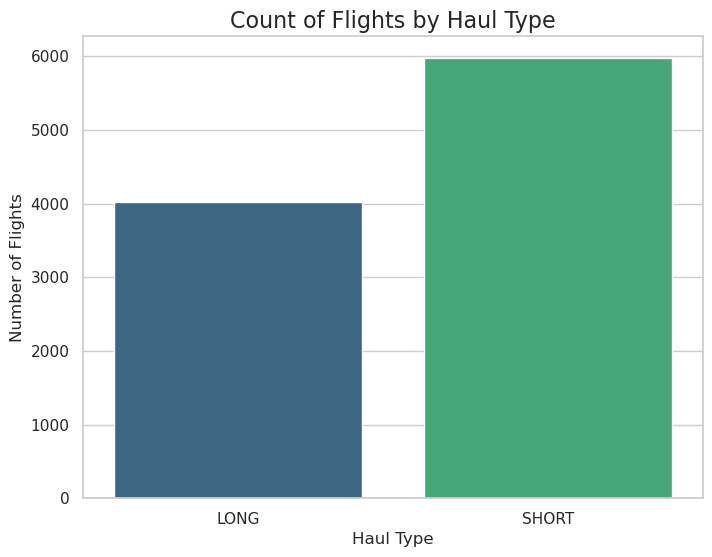

In [3]:
# We will continue using the 'df' DataFrame from the previous cell.

# Set the style for our plots
sns.set(style="whitegrid")

# --- 1. Univariate Analysis of a Numerical Column ---
# Let's create a 'TotalSeats' column first
df['TotalSeats'] = df['FIRST_CLASS_SEATS'] + df['BUSINESS_CLASS_SEATS'] + df['ECONOMY_SEATS']

# Create a histogram to see the distribution of TotalSeats
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalSeats'], bins=30, kde=True)
plt.title('Distribution of Total Seats per Aircraft', fontsize=16)
plt.xlabel('Total Seats', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.show()


# --- 2. Univariate Analysis of a Categorical Column ---
# Create a bar chart to see the count of LONG vs. SHORT haul flights
plt.figure(figsize=(8, 6))
sns.countplot(x='HAUL', data=df, palette='viridis')
plt.title('Count of Flights by Haul Type', fontsize=16)
plt.xlabel('Haul Type', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.show()

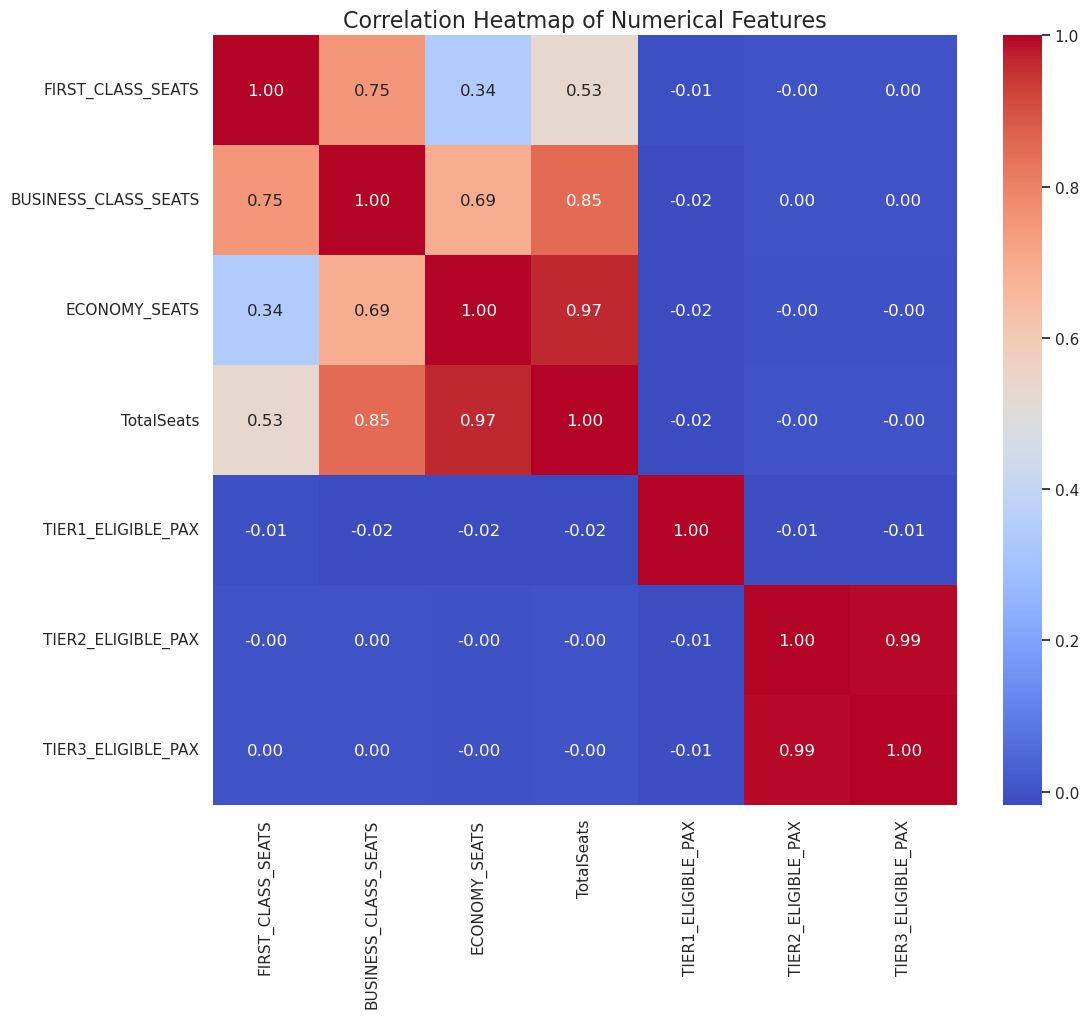

In [4]:
# We will continue using the 'df' DataFrame from the previous cell.

# Select only the numerical columns for our correlation analysis
numerical_df = df[[
    'FIRST_CLASS_SEATS', 'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS', 'TotalSeats',
    'TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX'
]]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,     # This shows the correlation numbers on the map
    cmap='coolwarm',# A color scheme where red is positive and blue is negative correlation
    fmt='.2f'       # Format the numbers to two decimal places
)

# Add a title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()